## **06-06 로지스틱 회귀 실습**

이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 로지스틱 회귀의 튜토리얼 자료입니다.  

링크 : https://wikidocs.net/111476

로지스틱 회귀를 케라스를 통해 구현해봅시다.

### **1. 케라스로 구현하는 로지스틱 회귀**
독립 변수 데이터를 x, 숫자 10 이상인 경우에는 1, 미만인 경우에는 0을 부여한 레이블 데이터를 y라고 해봅시다.

이번 데이터는 앞서 배운 단순 선형 회귀때와 마찬가지로 1개의 실수 x로부터 1개의 실수인 y를 예측하는 맵핑 관계를 가지므로 Dense의 output_dim, input_dim 인자값으로 각각 1을 기재합니다. 시그모이드 함수를 사용할 것이므로 activation의 인자값으로는 sigmoid를 기재해줍니다.

옵티마이저로는 가장 기본적인 경사 하강법인 sgd를 사용하였습니다. 시그모이드 함수를 사용한 이진 분류 문제에 손실 함수로 크로스 엔트로피 함수를 사용할 경우 binary_crossentropy를 기재해주면 됩니다. 에포크는 200으로 합니다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [3]:
x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# sgd = optimizers.SGD(lr=0.01)
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=300)

Epoch 1/300


c:\Users\dlwlg\anaconda3\envs\py310_yolo\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - binary_accuracy: 0.1538 - loss: 1.9849
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - binary_accuracy: 0.9231 - loss: 0.2162
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - binary_accuracy: 0.9231 - loss: 0.2139
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - binary_accuracy: 0.9231 - loss: 0.2121
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - binary_accuracy: 0.9231 - loss: 0.2105
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - binary_accuracy: 0.9231 - loss: 0.2091
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - binary_accuracy: 0.9231 - loss: 0.2080
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - binary_accuracy: 0.9231 - loss: 0.2070
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - binary_accuracy: 0.9231 - loss: 0.2061
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - binary_accuracy: 0.9231 - loss: 0.2053
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - binary_accuracy: 0.9231 - loss: 0.2045
Epoch 12

총 200회에 걸쳐 전체 데이터에 대한 오차를 최소화하는 w
와 b
를 찾아내는 작업을 합니다. 저자의 경우 약 190회부터 정확도가 100%가 나오기 시작했습니다. 실제값과 오차를 최소화하도록 값이 변경된 w
와 b
의 값을 가진 모델을 이용하여 그래프를 그려보겠습니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


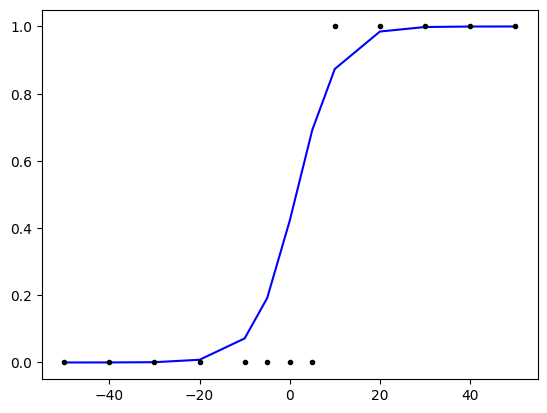

In [4]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

x의 값이 5와 10사이의 어떤 값일때 y값이 0.5가 넘기 시작하는 것처럼 보입니다. 정확도가 100%가 나왔었기 때문에 적어도 x의 값이 5일때는 y값이 0.5보다 작고, x의 값이 10일 때는 y값이 0.5를 넘을 것입니다. 이제 x의 값이 5보다 작은 값일 때와 x의 값이 10보다 클 때에 대해서 y값을 출력해봅시다.

In [5]:
## 리스트로 입력시 에러 발생 -> numpy array로 입력할것!
# print(model.predict([1, 2, 3, 4, 4.5]))
# print(model.predict([11, 21, 31, 41, 500]))

print(model.predict(np.array([1, 2, 3, 4, 4.5])))
print(model.predict(np.array([11, 21, 31, 41, 500]))) #, verbose=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.4774029 ]
 [0.53354347]
 [0.5888471 ]
 [0.6419935 ]
 [0.667398  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.8963961]
 [0.987944 ]
 [0.9987132]
 [0.999864 ]
 [1.       ]]


x의 값이 5보다 작을 때는 0.5보다 작은 값을, x의 값이 10보다 클 때는 0.5보다 큰 값을 출력하는 것을 볼 수 있습니다.